In [1]:
import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanSquaredError
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import BinaryCrossentropy

from sklearn.model_selection import train_test_split

from PIL import Image

from tqdm import tqdm

from matplotlib import pyplot

In [2]:
#loading the final npyfile
data = np.load(r'D:\mobilenetnpy_files_real\train_set_undooped-pit-tgt-img-b_box_rescaled_tgtis1.npy', 
               allow_pickle = True)

In [3]:
df = pd.DataFrame(data)

In [4]:
df

,0,1,2,3
0,00436515-870c-4b36-a041-de91049b9ab4,1,"[[2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 4, 4, 4, 5, 5,...","[57.75, 33.25, 46.59375, 46.59375, 122.9375, 3..."
1,00704310-78a8-4b38-8475-49f4573b2dbb,1,"[[40, 11, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, ...","[70.65625, 126.21875, 35.0, 35.0, 152.03125, 1..."
2,00aecb01-a116-45a2-956c-08d2fa55433f,1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[63.0, 70.4375, 20.5625, 20.5625, 119.65625, 6..."
3,00c0b293-48e7-4e16-ac76-9269ba535a62,1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[66.9375, 119.0, 36.75, 36.75, 142.1875, 111.7..."
4,00f08de1-517e-4652-a04f-d1dc9ee48593,1,"[[61, 63, 62, 73, 63, 60, 65, 67, 70, 71, 73, ...","[39.59375, 40.25, 45.0625, 45.0625, 124.90625,..."
...,...,...,...,...
6007,c18d1138-ba74-4af5-af21-bdd4d2c96bb5,1,"[[7, 11, 10, 10, 12, 9, 9, 9, 9, 8, 8, 9, 10, ...","[141.3125, 84.4375, 30.84375, 30.84375, 64.531..."
6008,c1cddf32-b957-4753-acaa-472ab1447e86,1,"[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[58.84375, 91.0, 42.21875, 42.21875, 167.5625,..."
6009,c1e73a4e-7afe-4ec5-8af6-ce8315d7a2f2,1,"[[23, 24, 24, 24, 23, 23, 23, 22, 22, 22, 22, ...","[145.6875, 91.4375, 40.6875, 40.6875, 69.125, ..."
6010,c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8,1,"[[2, 1, 1, 2, 3, 4, 5, 5, 4, 5, 4, 4, 5, 6, 5,...","[133.21875, 101.5, 52.5, 52.5, 40.46875, 65.18..."


0 is patient id X_train will the 2, which are the images and y will 3 which is the bb

In [5]:
# pre-processing the input
from tensorflow.keras.applications.mobilenet import preprocess_input

df['imgs'] = df[2].map(lambda x: preprocess_input(x))

In [6]:
X = df['imgs'].map(lambda x: np.expand_dims(x, axis = 2))

In [7]:
X[0].shape

(224, 224, 1)

[[-0.6862745  -0.9137255  -0.9843137  ... -0.9843137  -0.9843137
  -0.99215686]
 [-0.7019608  -0.9137255  -0.9843137  ... -0.9843137  -0.9843137
  -0.99215686]
 [-0.69411767 -0.9137255  -0.9843137  ... -0.9843137  -0.9843137
  -0.99215686]
 ...
 [-0.75686276 -0.88235295 -0.92156863 ... -0.9764706  -0.94509804
  -0.90588236]
 [-0.5764706  -0.7254902  -0.77254903 ... -0.9529412  -0.8901961
  -0.827451  ]
 [-0.3098039  -0.45098037 -0.4980392  ... -0.8745098  -0.8039216
  -0.7176471 ]]
(224, 224)


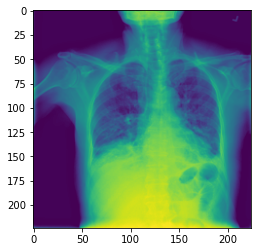

In [8]:
from matplotlib import pyplot
n = 1
print(df['imgs'][n])
print(df['imgs'][n].shape)
pyplot.imshow(df['imgs'][n])

SWEET ! 🍬🍬🍬🍬

everything seems good ! ✨✨

In [9]:
df.shape[0]

6012

In [10]:
X1 = np.zeros((int(df.shape[0]),224, 224,1))

In [11]:
for i in range(len(X)):
    X1[i] = X[i]

In [12]:
preds = np.zeros((int(df.shape[0]), 16))

In [13]:
for i in range(len(df)):
    for j in range(16):
        preds[i][j] = df[3][i][j]
        #print(type(y[i][j]))
preds[0]

array([ 57.75   ,  33.25   ,  46.59375,  46.59375, 122.9375 ,  33.25   ,
        56.     ,  56.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ])

In [14]:
preds_class = np.zeros((int(df.shape[0]), 1))

In [15]:
for i in range(len(df)):
    for j in range(16):
        preds_class[i] = df[1][i]
        #print(type(y[i][j]))
preds_class[0]

array([1.])

In [16]:
df = None

In [17]:
preds.shape

(6012, 16)

In [18]:
preds = tf.constant(preds, shape = (6012,16), dtype = tf.float64)

In [19]:
preds_class = tf.constant(preds_class, shape = (6012,1), dtype = tf.float64)

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape, Flatten, Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.models import Model
from tensorflow.keras.losses import MeanSquaredError


In [21]:
mob_net = MobileNet(input_shape = (224,224,3), weights = 'imagenet', include_top= False) 

input_tensor = Input(shape=(224,224,1))
x = Conv2D(3,(3,3),padding='same')(input_tensor)    # x has a dimension of (IMG_SIZE,IMG_SIZE,3)
out = mob_net (x) 

model = Model(inputs=input_tensor,outputs=out)

In [22]:
x = GlobalAveragePooling2D()(model.output)
x = Dense(588,  activation = 'relu')(x)
x = Dense(294, activation = 'relu')(x)
x = Dense(147, activation = 'relu')(x)
regr = Dense(16, activation = 'linear')(x)
model1 = Model(inputs = model.input, outputs = regr, name = 'regr_op')

In [23]:
clf = Dense(1, activation = 'sigmoid', name = 'clf_op')(x)
modelCLF_REGR = Model(inputs = model1.input, outputs = [regr, clf])

In [24]:
modelCLF_REGR.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 224, 224, 3)  30          input_2[0][0]                    
__________________________________________________________________________________________________
mobilenet_1.00_224 (Model)      (None, 7, 7, 1024)   3228864     conv2d[0][0]                     
__________________________________________________________________________________________________
global_average_pooling2d (Globa (None, 1024)         0           mobilenet_1.00_224[1][0]         
____________________________________________________________________________________________

In [25]:
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import BinaryAccuracy

In [26]:
optimizer = 'adam'
modelCLF_REGR.compile(optimizer = optimizer,
                loss = {'dense_3' : MeanSquaredError(), 'clf_op' : BinaryCrossentropy()},  
                metrics = {'dense_3' :MeanSquaredError(), 'clf_op' :BinaryAccuracy()})

In [27]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import datetime


checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor = "val_loss", save_best_only = True,
                             save_weights_only = True, mode = "auto")


stop = EarlyStopping(monitor = "val_dense_3_mean_squared_error", patience = 5, mode = "min", 
                     restore_best_weights = True)


reduce_lr = ReduceLROnPlateau(monitor = "val_dense_3_mean_squared_error", factor = 0.2, patience = 2, 
                              min_lr = 1e-6, mode = "auto")

In [28]:
history = modelCLF_REGR.fit(X1, [preds, preds_class],
                      validation_split = 0.2,
                      batch_size = 16,
                      epochs=100, 
                      callbacks=[checkpoint, reduce_lr, stop],
                     )

Epoch 1/100
301/301 [==============================] - 39s 128ms/step - loss: 631.9837 - dense_3_loss: 631.7765 - clf_op_loss: 0.2073 - dense_3_mean_squared_error: 631.7509 - clf_op_binary_accuracy: 0.9636 - val_loss: 575.3832 - val_dense_3_loss: 575.3832 - val_clf_op_loss: 2.8523e-07 - val_dense_3_mean_squared_error: 574.6342 - val_clf_op_binary_accuracy: 1.0000 - lr: 0.0010
Epoch 2/100
301/301 [==============================] - 38s 126ms/step - loss: 544.0223 - dense_3_loss: 544.0221 - clf_op_loss: 2.9174e-04 - dense_3_mean_squared_error: 544.0096 - clf_op_binary_accuracy: 1.0000 - val_loss: 599.8358 - val_dense_3_loss: 599.8333 - val_clf_op_loss: 0.0026 - val_dense_3_mean_squared_error: 597.7442 - val_clf_op_binary_accuracy: 1.0000 - lr: 0.0010
Epoch 3/100
301/301 [==============================] - 38s 126ms/step - loss: 518.6971 - dense_3_loss: 518.6967 - clf_op_loss: 4.1295e-04 - dense_3_mean_squared_error: 518.8724 - clf_op_binary_accuracy: 1.0000 - val_loss: 576.0008 - val_dense

In [29]:
print(history.history.keys())

dict_keys(['loss', 'dense_3_loss', 'clf_op_loss', 'dense_3_mean_squared_error', 'clf_op_binary_accuracy', 'val_loss', 'val_dense_3_loss', 'val_clf_op_loss', 'val_dense_3_mean_squared_error', 'val_clf_op_binary_accuracy', 'lr'])


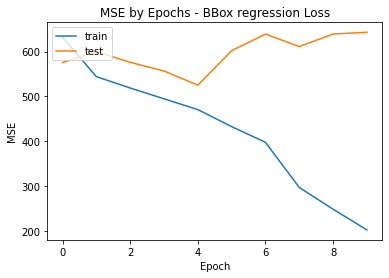

In [30]:
plt.plot(history.history['dense_3_loss'])
plt.plot(history.history['val_dense_3_loss'])
plt.title('MSE by Epochs - BBox regression Loss')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

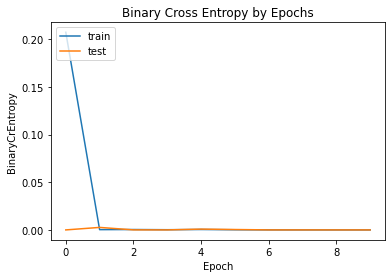

In [31]:
plt.plot(history.history['clf_op_loss'])
plt.plot(history.history['val_clf_op_loss'])
plt.title('Binary Cross Entropy by Epochs')
plt.ylabel('BinaryCrEntropy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

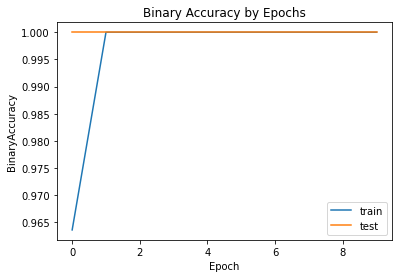

In [32]:
plt.plot(history.history['clf_op_binary_accuracy'])
plt.plot(history.history['val_clf_op_binary_accuracy'])
plt.title('Binary Accuracy by Epochs')
plt.ylabel('BinaryAccuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
